## Compare rbid 2 to the rbid 1 candidates

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

font = {'size' : 15}
mpl.rc('font', **font)

In [2]:
rbid2_fnm = 'source_detection_summary_files/candidates.dat'
rbid2_candids = np.loadtxt( rbid2_fnm, dtype='str', usecols=(1) )
rbid2_Cobj    = np.loadtxt( rbid2_fnm, dtype='int', usecols=(4) )
rbid2_meanRB  = np.loadtxt( rbid2_fnm, dtype='float', usecols=(5) )

rbid1_fnm = '../extragalactic_fields/source_detection_summary_files/candidates.dat'
rbid1_candids = np.loadtxt( rbid1_fnm, dtype='str', usecols=(1) )
rbid1_Cobj    = np.loadtxt( rbid1_fnm, dtype='int', usecols=(4) )
rbid1_meanRB  = np.loadtxt( rbid1_fnm, dtype='float', usecols=(5) )

rbid2_rbid1_ix = np.zeros( len(rbid2_candids), dtype='int' ) -1
rbid1_rbid2_ix = np.zeros( len(rbid1_candids), dtype='int' ) -1

for i in range(len(rbid2_candids)):
    tx = np.where( rbid2_candids[i] == rbid1_candids )[0]
    if len(tx) == 1:
        rbid2_rbid1_ix[i] = tx[0]
        rbid1_rbid2_ix[tx[0]] = i
    del tx

tx2 = np.where( rbid2_rbid1_ix >= 0 )[0]
tx1 = np.where( rbid1_rbid2_ix >= 0 )[0]
print('rbid2 matched to rbid1: ', len(tx2), float(len(tx2))/float(len(rbid2_rbid1_ix)))
print('rbid1 matched to rbid2: ', len(tx1), float(len(tx1))/float(len(rbid1_rbid2_ix)))

rbid2 matched to rbid1:  1263 0.2880930656934307
rbid1 matched to rbid2:  1263 0.6819654427645788


<br>
<br>
So 50% of the candidates we 'released' are now 'not released'.
That's not good.

## Do their Cobj or meanRB parameters match?

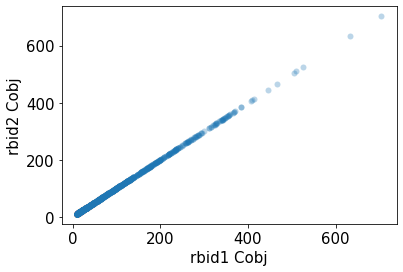

In [3]:
plt.plot( rbid1_Cobj[rbid2_rbid1_ix[tx2]], rbid2_Cobj[tx2], 'o', mew=0, alpha=0.3 )
plt.xlabel('rbid1 Cobj')
plt.ylabel('rbid2 Cobj')
plt.show()

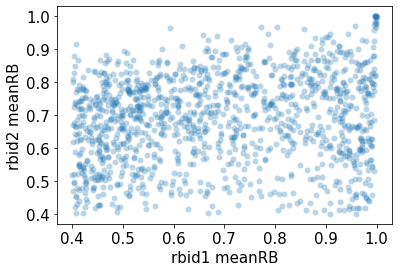

In [4]:
# R/B scores appear to be NOT correlated
plt.plot( rbid1_meanRB[rbid2_rbid1_ix[tx2]], rbid2_meanRB[tx2], 'o', mew=0, alpha=0.3 )
plt.xlabel('rbid1 meanRB')
plt.ylabel('rbid2 meanRB')
plt.show()

In [5]:
del tx1, tx2

## Plot lightcurves for a random sample of the unmatched rbid1 candidates.

These are not 'nightly-epoch' lightcurves, they are single-image objects lightcurves.

In [6]:
rbid1_co_fnm = '../extragalactic_fields/source_detection_summary_files/candidate_objects.dat'

rbid1_co_candid = np.loadtxt(rbid1_co_fnm, dtype='str', usecols=(1))
rbid1_co_mjd    = np.loadtxt(rbid1_co_fnm, dtype='float', usecols=(5))
rbid1_co_filter = np.loadtxt(rbid1_co_fnm, dtype='str', usecols=(6))
rbid1_co_mag    = np.loadtxt(rbid1_co_fnm, dtype='float', usecols=(7))
rbid1_co_magerr = np.loadtxt(rbid1_co_fnm, dtype='float', usecols=(8))

In [7]:
filters = ['g','r','i']
fsym = ['o','s','^']
fclr = ['darkgreen','darkorange','darkred']

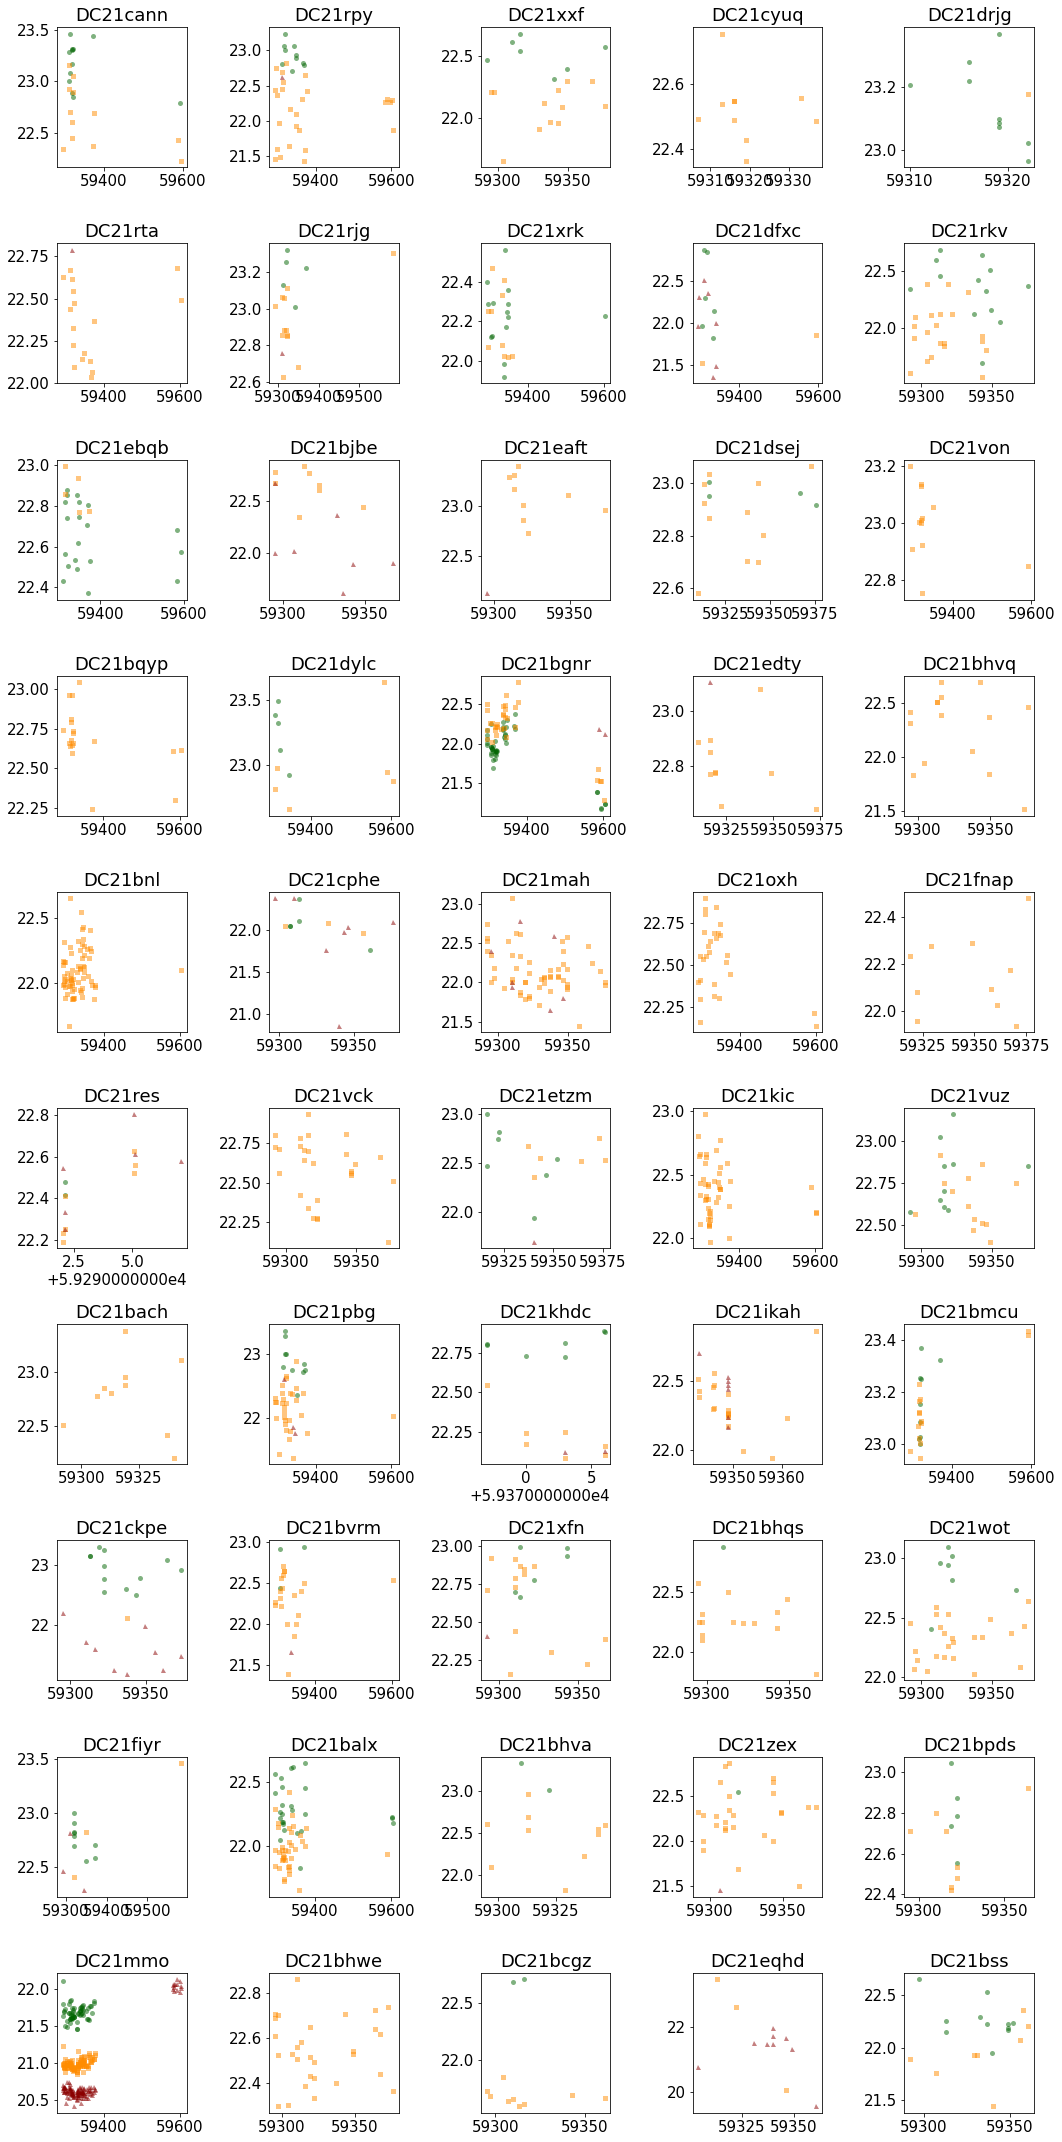

In [8]:
tx = np.where( rbid1_rbid2_ix < 0 )[0]

i=0
j=0

fig, ax = plt.subplots( 10, 5, figsize=(15,30), sharey=False )
for r in range(50):
    cox = np.where( rbid1_candids[tx[r]] == rbid1_co_candid )[0]
    # print( rbid1_candids[tx[r]], len(cox) )
    for f,filt in enumerate(filters):
        fx = np.where( rbid1_co_filter[cox] == filt )[0]
        # print(i, j, filt, len(fx) )
        if len(fx) > 0:
            ax[i,j].plot( rbid1_co_mjd[cox[fx]], rbid1_co_mag[cox[fx]], \
                         fsym[f], ms=5, mew=0, alpha=0.5, color=fclr[f])
        del fx
    ax[i,j].set_title(rbid1_candids[tx[r]])
    j += 1
    if j == 5:
        j = 0
        i += 1

plt.tight_layout()
plt.show()

DC21mmo looks possibly transient-like?

But it would not be included in the RBID=2 identified candiates.

## What happened to some of the SNIa Menagerie?

In [9]:
rbid1_snia = np.asarray( ['DC21dhgr', 'DC21dna', 'DC21gayy', 'DC21ktp', 'DC21ifio', 'DC21dqik',
                          'DC21jfcb', 'DC21fber', 'DC21bkrj', 'DC21cove', 'DC21dslz', 'DC22eawkf',
                          'DC21cgfrp', 'DC21cgfhs', 'DC21cwcwp', 'DC21cwtvj', 'DC21cwtlp', 'DC21cwxin',
                          'DC21cyddn', 'DC21drcmp', 'DC21dsocp', 'DC22duvcm'], dtype='str' )
num = 0
for snia in rbid1_snia:
    tx = np.where( rbid2_candids == snia )[0]
    if len(tx) == 1:
        num += 1
        print(snia, num)
    else:
        print(snia)


DC21dhgr 1
DC21dna 2
DC21gayy
DC21ktp 3
DC21ifio 4
DC21dqik 5
DC21jfcb 6
DC21fber 7
DC21bkrj 8
DC21cove 9
DC21dslz 10
DC22eawkf 11
DC21cgfrp 12
DC21cgfhs 13
DC21cwcwp
DC21cwtvj 14
DC21cwtlp 15
DC21cwxin 16
DC21cyddn 17
DC21drcmp 18
DC21dsocp 19
DC22duvcm 20


Next step: look at their triplets. Do they seem like real things that shouldn't have been rejected by the rbid2 R/B classifier?